# Objective
This notebook demonstrates the SpotImage tool, which generates synthetic spot images.

In [1]:
from SpotImage import SpotImage

In [2]:
# General parameters
cmap = 'gray'
img_sz = 300
patch_sz = 11

# Spot parameters
num_spots = 200
spot_sigma = 1.75
spot_shape_params = ['2D_Gauss', spot_sigma]

# SNR Distribution Parameters
snr_mu = 10
snr_sigma = 20
snr_distr_params = ['Gauss', snr_mu, snr_sigma]

# Add to the threshold found by Otsu's so that spots appear in brighter parts of cells/tissue.
# Increasing this value decreases the area where spots can be located.
intensity_threshold = 2

# Parameters for visualizing and saving the SpotImage
plot_spots = False
plot_img = True
save_spots = False
save_img = False
spots_filename = None
spot_img_filename = None

## Instantiate and generate SpotImages
Three of the six background images used in this notebook are cropped from the cell culture image (MAX_C3-ISP_FixationTest_293T_PFA_20180601_1_MMStack_Pos0.ome.tif) and three are from the tissue image (MAX_ISP_smFISH_msLung_60x_1-47_20180319_1_pos0.tif). 

I aimed to select FOVs that represent a variety of features. This Google doc describes the location of each crop:
https://drive.google.com/file/d/1A2m7QxnMq1SQaeiZ-zSBgBE9YFNYD2XG/view?usp=sharing

### Using cell culture background images

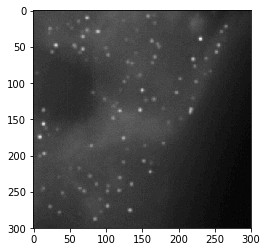

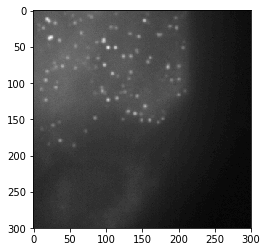

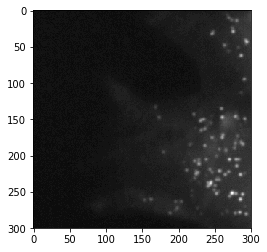

In [3]:
for i in range(1,4):
    bg_img_filename = 'MAX_C3-ISP_300_' + str(i) + '.tif'
    si = SpotImage(bg_img_filename, cmap, img_sz, patch_sz, num_spots, spot_shape_params, snr_distr_params, intensity_threshold)
    si.generate_spot_image(plot_spots, plot_img, save_spots, spots_filename, save_img, spot_img_filename)

### Using tissue background images

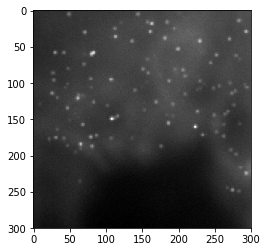

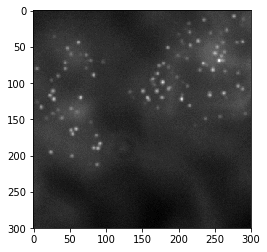

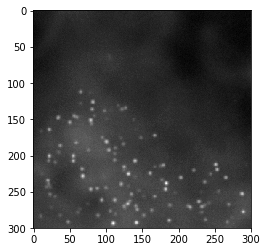

In [4]:
for i in range(1,4):
    bg_img_filename = 'MAX_ISP_300_' + str(i) + '.tif'
    si = SpotImage(bg_img_filename, cmap, img_sz, patch_sz, num_spots, spot_shape_params, snr_distr_params, intensity_threshold)
    si.generate_spot_image(plot_spots, plot_img, save_spots, spots_filename, save_img, spot_img_filename)

## Toggle the number of spots

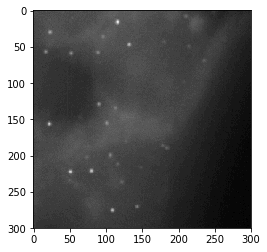

In [5]:
bg_img_filename = 'MAX_C3-ISP_300_1.tif'
num_spots = 50
si_50spots = SpotImage(bg_img_filename, cmap, img_sz, patch_sz, num_spots, spot_shape_params, snr_distr_params, intensity_threshold)
si_50spots.generate_spot_image(plot_spots, plot_img, save_spots, spots_filename, save_img, spot_img_filename)

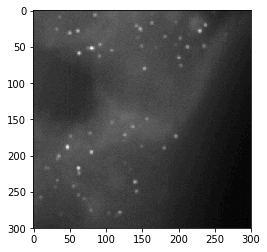

In [6]:
num_spots = 100
si_100spots = SpotImage(bg_img_filename, cmap, img_sz, patch_sz, num_spots, spot_shape_params, snr_distr_params, intensity_threshold)
si_100spots.generate_spot_image(plot_spots, plot_img, save_spots, spots_filename, save_img, spot_img_filename)

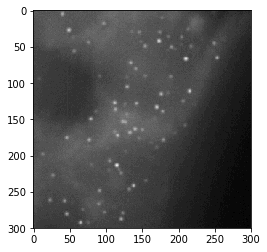

In [7]:
num_spots = 150
si_150spots = SpotImage(bg_img_filename, cmap, img_sz, patch_sz, num_spots, spot_shape_params, snr_distr_params, intensity_threshold)
si_150spots.generate_spot_image(plot_spots, plot_img, save_spots, spots_filename, save_img, spot_img_filename)

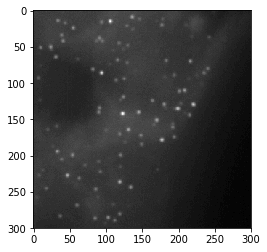

In [8]:
num_spots = 200
si_200spots = SpotImage(bg_img_filename, cmap, img_sz, patch_sz, num_spots, spot_shape_params, snr_distr_params, intensity_threshold)
si_200spots.generate_spot_image(plot_spots, plot_img, save_spots, spots_filename, save_img, spot_img_filename)

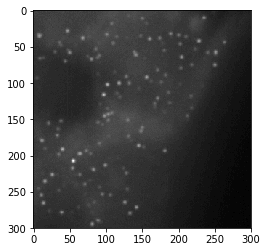

In [9]:
num_spots = 250
si_250spots = SpotImage(bg_img_filename, cmap, img_sz, patch_sz, num_spots, spot_shape_params, snr_distr_params, intensity_threshold)
si_250spots.generate_spot_image(plot_spots, plot_img, save_spots, spots_filename, save_img, spot_img_filename)

## Toggle SNR distribution mean
I am keeping the spread of the SNR distribution for now at 10 units, which seems to be a good value for realistic-looking images.

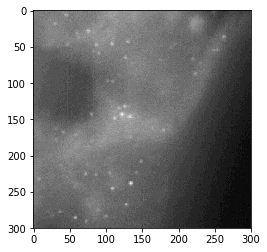

In [10]:
num_spots = 100

snr_mu = 5
snr_sigma = 5
snr_distr_params = ['Gauss', snr_mu, snr_sigma]
si_snr_mu_5 = SpotImage(bg_img_filename, cmap, img_sz, patch_sz, num_spots, spot_shape_params, snr_distr_params, intensity_threshold)
si_snr_mu_5.generate_spot_image(plot_spots, plot_img, save_spots, spots_filename, save_img, spot_img_filename)

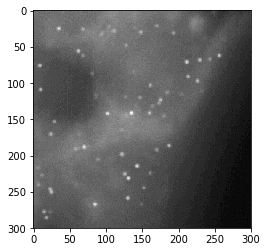

In [11]:
snr_mu = 10
snr_sigma = 10
snr_distr_params = ['Gauss', snr_mu, snr_sigma]
si_snr_mu_10 = SpotImage(bg_img_filename, cmap, img_sz, patch_sz, num_spots, spot_shape_params, snr_distr_params, intensity_threshold)
si_snr_mu_10.generate_spot_image(plot_spots, plot_img, save_spots, spots_filename, save_img, spot_img_filename)

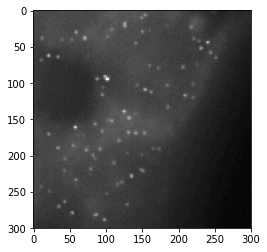

In [12]:
snr_mu = 20
snr_sigma = 10
snr_distr_params = ['Gauss', snr_mu, snr_sigma]
si_snr_mu_20 = SpotImage(bg_img_filename, cmap, img_sz, patch_sz, num_spots, spot_shape_params, snr_distr_params, intensity_threshold)
si_snr_mu_20.generate_spot_image(plot_spots, plot_img, save_spots, spots_filename, save_img, spot_img_filename)

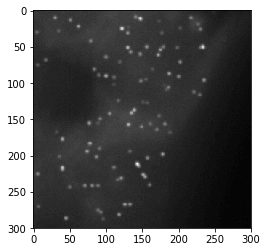

In [13]:
snr_mu = 40
snr_sigma = 10
snr_distr_params = ['Gauss', snr_mu, snr_sigma]
si_snr_mu_40 = SpotImage(bg_img_filename, cmap, img_sz, patch_sz, num_spots, spot_shape_params, snr_distr_params, intensity_threshold)
si_snr_mu_40.generate_spot_image(plot_spots, plot_img, save_spots, spots_filename, save_img, spot_img_filename)

# Thoughts and Open Questions

### Which / how many background images should be used in the experiment?

Shoule we pick the best crop of the cell culture image and the best crop of the tissue image, or use a variety of crops from each? The Google doc I referenced above that describes the crops (https://drive.google.com/file/d/1A2m7QxnMq1SQaeiZ-zSBgBE9YFNYD2XG/view?usp=sharing) shows that the various fields of view on one background image can have a variety of different features.

Each image => (3 values of mean SNR) x (3 values of num_spots) x (10 workers) x (5 cents/image) = 90 * (0.05) = 4.50 dollars.

### Is it okay that this experiment focuses on the correctness of clusters rather than completeness of clusters?

For example, the image under "Toggle SNR distribution mean" with snr_mu = 5 seems to be one of the more realistic looking spot images. My eyes could only discern 56/100 spots on average. (I counted 55, 55, and 58 spots on three different occasions.) I thought about setting a minimum SNR below which, regardless of the distribution, spots are artificially brightened enough to be visible. But it seems like many of the spots in the actual images with representative smFISH signals (https://drive.google.com/open?id=1-AG0QZVN1gHVfgpr-ogF8JvmHW3nqdOf) are also difficult to discern, and there may be some spots in these actual images that will escape detection by all workers. Does it seem that this experiment should focus on correctness of clusters identified rather than completeness of clusters identified, since identifying clusters completely from actual images would not be feasible anyway?

